# Twitter Sentiment Analysis - 01 Data Wrangling

Data wrangling is the process of removing errors and combining complex data sets to make them more accessible and easier to analyze. Due to the rapid expansion of the amount of data and data sources available today, storing and organizing large quantities of data for analysis is becoming increasingly necessary.

In this notebook, we will scrape tweets with specific hastags (appl, apple, ipad, iphone) using the Snscrape method, and generate Apple stock data for the month of December 2022. At the end of this notebook, we will produce two datasets: live tweets from Dec. 202220222 (*01_tweets_data*) and historical stock price from Dec. 2022 (*01_stock_data*).

**Link(s) to previous notebook(s)**: \
00_Historical_Data_2014: https://github.com/parisvu07/Springboard_Data_Science/tree/main/Capstone_2_Twitter_Sentiment_Analysis

Quick fix for "Unable to render rich display": copy and paste the notebook link to https://nbviewer.org

## 1.1 Preparation

Importing necessary libraries

In [1]:
import sys
print(sys.executable)
import tweepy
from textblob import TextBlob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')
import yfinance as yf
from datetime import date, datetime, timedelta
import time
import requests
import io

/opt/anaconda3/bin/python


## 1.2 Tweet Scraping

Now that we have a good grasp at historical data and their most repeated key words (Notebook: 00_Historical_Data_2014), we will scrape the most recently updated tweets from Twitter using Tweepy or Snscrape

**Tweepy** \
Tweepy is a Python library for integrating with the Twitter API. Because Tweepy is connected with the Twitter API, you can perform complex queries in addition to scraping tweets. It enables you to take advantage of all of the Twitter API's capabilities. But there are some drawbacks – like the fact that its standard API only allows you to collect tweets for up to a week (that is, Tweepy does not allow recovery of tweets beyond a week window, so historical data retrieval is not permitted).

**Snscrape** \
Snscrape is another approach for scraping information from Twitter that does not require the use of an API. Snscrape allows you to scrape basic information such as a user's profile, tweet content, source, and so on. Snscrape is not limited to Twitter, but can also scrape content from other prominent social media networks like Facebook, Instagram, and others.

In [2]:
#loading Twitter credentials. This is primarily used in the Tweepy method.
log = pd.read_csv('/Users/user/Documents/Springboard_Data_Science/Capstone_2_Twitter_Sentiment_Analysis/Data/twitter_credentials.csv')
#Twitter API credentials
consumerKey = log['Key'][0]
consumerSecret = log['Key'][1]
accessToken = log['Key'][2]
accessSecret = log['Key'][3]
bearerToken = log['Key'][4]

After trials and errors, I've decided to use Snsscrape for this project due to its flexibility in pulling as much tweets as I want without using API. However, I'll still leave API information here just in case we need it later down the project.

### 1.2.1 Snscrape

In [3]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('AAPL since:2022-12-1 until:2022-12-31').get_items()):
    if i>100000:
        break
    attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
# Creating a dataframe to load the list
tweets_data = pd.DataFrame(attributes_container, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])

In [4]:
# Creating list to append tweet data to
attributes_container_2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('apple since:2022-12-1 until:2022-12-31').get_items()):
    if i>100000:
        break
    attributes_container_2.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
# Creating a dataframe to load the list
tweets_data_2 = pd.DataFrame(attributes_container_2, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])

In [5]:
# Creating list to append tweet data to
attributes_container_3 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('iPhone since:2022-12-1 until:2022-12-31').get_items()):
    if i>100000:
        break
    attributes_container_3.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
# Creating a dataframe to load the list
tweets_data_3 = pd.DataFrame(attributes_container_3, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])

In [6]:
#Checking for null values
print(tweets_data.info())
print(tweets_data_2.info())
print(tweets_data_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   User             100001 non-null  object             
 1   Date Created     100001 non-null  datetime64[ns, UTC]
 2   Number of Likes  100001 non-null  int64              
 3   Source of Tweet  100001 non-null  object             
 4   Tweet            100001 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   User             100001 non-null  object             
 1   Date Created     100001 non-null  datetime64[ns, UTC]
 2   Number of Likes  100001 non-null  int64        

In [7]:
#Renaming columns
tweets_data.columns = ['user', 'created_at', 'likes', 'source', 'text']
tweets_data_2.columns = ['user', 'created_at', 'likes', 'source', 'text']
tweets_data_3.columns = ['user', 'created_at', 'likes', 'source', 'text']

In [8]:
#Checking for range
print(tweets_data.created_at.min())
print(tweets_data.created_at.max())

2022-12-01 15:19:15+00:00
2022-12-30 23:59:51+00:00


### 1.2.2 Combining dataframes

In [9]:
#Concatenating 3 dataframes and reseting their indexes to 0 - n-1
tweets_data = pd.concat([tweets_data, tweets_data_2, tweets_data_3], ignore_index=True)
tweets_data.head()

,user,created_at,likes,source,text
0,Cimaguatemala,2022-12-30 23:59:51+00:00,0,Twitter for Android,"@bernardegar Tesla , jnj, aapl, Amazon"
1,Keanu5004,2022-12-30 23:59:34+00:00,0,Twitter Web App,Thanks &gt;https://t.co/tXysTF2CeA\nearn aroun...
2,Smith28301,2022-12-30 23:59:27+00:00,0,Twitter Web App,WILL GO BACK OVER $1K soon\n\nhttps://t.co/3in...
3,Smith28301,2022-12-30 23:58:37+00:00,0,Twitter Web App,$PTON on fire. To know the details join the di...
4,Keanu5004,2022-12-30 23:58:30+00:00,0,Twitter Web App,Join the most profitable trading group \nhttps...


In [10]:
#Looking into missing values to see if we need to eliminate any rows
missing_tweets = pd.concat([tweets_data.isnull().sum(), 100 * tweets_data.isnull().mean()], axis=1)
missing_tweets.columns=['count','%']
missing_tweets.sort_values(by=['%'], ascending=False) 

,count,%
user,0,0.0
created_at,0,0.0
likes,0,0.0
source,0,0.0
text,0,0.0


In [11]:
#Checking indexes of the dataframe
tweets_data.index

RangeIndex(start=0, stop=300003, step=1)

### 1.2.3 Separating Date and Time

Since the purpose of the analysis is to use the tweets during trading hours to predict the closing price, we would need to filter out only tweets that were produced from 6:30 AM PST to 1:30 PM PST. To do so, we will need to split date and time into two different columns

In [12]:
#Splitting dates and times
tweets_data['Dates'] = [d.date() for d in tweets_data['created_at']]
tweets_data['Time'] = [d.time() for d in tweets_data['created_at']]

#Delete "create_at" since we no longer need it
tweets_data = tweets_data.drop('created_at', axis=1) \

#Setting the "Dates" column as index because we will be using it to filter out "trading-hours" tweets
tweets_data.set_index('Dates', inplace=True)

tweets_data.head()

,user,likes,source,text,Time
Dates,,,,,
2022-12-30,Cimaguatemala,0,Twitter for Android,"@bernardegar Tesla , jnj, aapl, Amazon",23:59:51
2022-12-30,Keanu5004,0,Twitter Web App,Thanks &gt;https://t.co/tXysTF2CeA\nearn aroun...,23:59:34
2022-12-30,Smith28301,0,Twitter Web App,WILL GO BACK OVER $1K soon\n\nhttps://t.co/3in...,23:59:27
2022-12-30,Smith28301,0,Twitter Web App,$PTON on fire. To know the details join the di...,23:58:37
2022-12-30,Keanu5004,0,Twitter Web App,Join the most profitable trading group \nhttps...,23:58:30


In [13]:
#Rearranging the columns because we want the structure to match the stock price dataframe
cols = tweets_data.columns.tolist()
print(cols)

['user', 'likes', 'source', 'text', 'Time']


In [14]:
cols = cols[-1:] + cols[:-1]
print(cols)

['Time', 'user', 'likes', 'source', 'text']


In [15]:
#Applying the new column order to the dataframe tweets_data
tweets_data = tweets_data[cols]

### 1.2.4 Subjectivity and Polarity

Subjectivity detection and polarity detection are subtasks under sentiment analysis. Subjectivity detection aims to remove 'factual' or 'neutral' content, i.e., objective text that does not contain any opinion. Polarity detection aims to differentiate the opinion into 'positive' and 'negative'

In [16]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
tweets_data['Subjectivity'] = tweets_data['text'].apply(getSubjectivity)
tweets_data['Polarity'] = tweets_data['text'].apply(getPolarity)

#Show the two new columns
tweets_data.head()

,Time,user,likes,source,text,Subjectivity,Polarity
Dates,,,,,,,
2022-12-30,23:59:51,Cimaguatemala,0,Twitter for Android,"@bernardegar Tesla , jnj, aapl, Amazon",0.0,0.0
2022-12-30,23:59:34,Keanu5004,0,Twitter Web App,Thanks &gt;https://t.co/tXysTF2CeA\nearn aroun...,0.2,0.2
2022-12-30,23:59:27,Smith28301,0,Twitter Web App,WILL GO BACK OVER $1K soon\n\nhttps://t.co/3in...,0.0,0.0
2022-12-30,23:58:37,Smith28301,0,Twitter Web App,$PTON on fire. To know the details join the di...,0.0,0.0
2022-12-30,23:58:30,Keanu5004,0,Twitter Web App,Join the most profitable trading group \nhttps...,0.5,0.5


In [17]:
#Create a function to compute the negative, neutral, and positive analysis 
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
tweets_data['Analysis'] = tweets_data['Polarity'].apply(getAnalysis)

#Show the dataframe
tweets_data

,Time,user,likes,source,text,Subjectivity,Polarity,Analysis
Dates,,,,,,,,
2022-12-30,23:59:51,Cimaguatemala,0,Twitter for Android,"@bernardegar Tesla , jnj, aapl, Amazon",0.000000,0.00,Neutral
2022-12-30,23:59:34,Keanu5004,0,Twitter Web App,Thanks &gt;https://t.co/tXysTF2CeA\nearn aroun...,0.200000,0.20,Positive
2022-12-30,23:59:27,Smith28301,0,Twitter Web App,WILL GO BACK OVER $1K soon\n\nhttps://t.co/3in...,0.000000,0.00,Neutral
2022-12-30,23:58:37,Smith28301,0,Twitter Web App,$PTON on fire. To know the details join the di...,0.000000,0.00,Neutral
2022-12-30,23:58:30,Keanu5004,0,Twitter Web App,Join the most profitable trading group \nhttps...,0.500000,0.50,Positive
...,...,...,...,...,...,...,...,...
2022-12-28,23:28:12,n9vrl7,0,TwitCasting,モイ！iPhoneからキャス配信中 \nhttps://t.co/oKJujZNHwm,0.000000,0.00,Neutral
2022-12-28,23:28:11,Doubt_Evrything,0,Twitter for iPhone,"I've had an iPhone every year since 2009, star...",0.211111,0.15,Positive
2022-12-28,23:28:10,akihihro,5,Twitter Web App,やまなみハイウェイをドライブ\n林道を抜けると壮大な景色が現れた\n\n〒874-0000 ...,0.000000,0.00,Neutral


In [18]:
#Create a function to remap the Analysis types to integers
def new_sentiment(x):
    if x == "Negative":
        return -1
    elif x == "Neutral":
        return 0
    else:
        return 1
    
tweets_data['Sentiment'] = tweets_data['Analysis'].apply(new_sentiment)

-1 = Negative; 0 = Neutral; 1 = Positive

In [19]:
#Print all of the positive tweets
"""j=1
sorted_tweets_data = tweets_data.sort_values(by=['Polarity'])
for i in range(0, sorted_tweets_data.shape[0]):
    if sorted_tweets_data['Analysis'][i] == 'Positive':
        print(str(j) + ') '+ sorted_tweets_data['text'][i].head(20))
        j = j+1 """

"j=1\nsorted_tweets_data = tweets_data.sort_values(by=['Polarity'])\nfor i in range(0, sorted_tweets_data.shape[0]):\n    if sorted_tweets_data['Analysis'][i] == 'Positive':\n        print(str(j) + ') '+ sorted_tweets_data['text'][i].head(20))\n        j = j+1 "

In [20]:
#Print all of the negative tweets in descending order
"""j=1
sorted_tweets_data = tweets_data.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sorted_tweets_data.shape[0]):
    if sorted_tweets_data['Analysis'][i] == 'Negative':
        print(str(j) + ') '+ sorted_tweets_data['text'][i].head(20))
        j = j+1"""

"j=1\nsorted_tweets_data = tweets_data.sort_values(by=['Polarity'], ascending=False)\nfor i in range(0, sorted_tweets_data.shape[0]):\n    if sorted_tweets_data['Analysis'][i] == 'Negative':\n        print(str(j) + ') '+ sorted_tweets_data['text'][i].head(20))\n        j = j+1"

## 1.3 Stock Price

Let's look at the overall stock fluctuation of AAPL from 12/1/22 - 12/31/2022

[*********************100%***********************]  1 of 1 completed


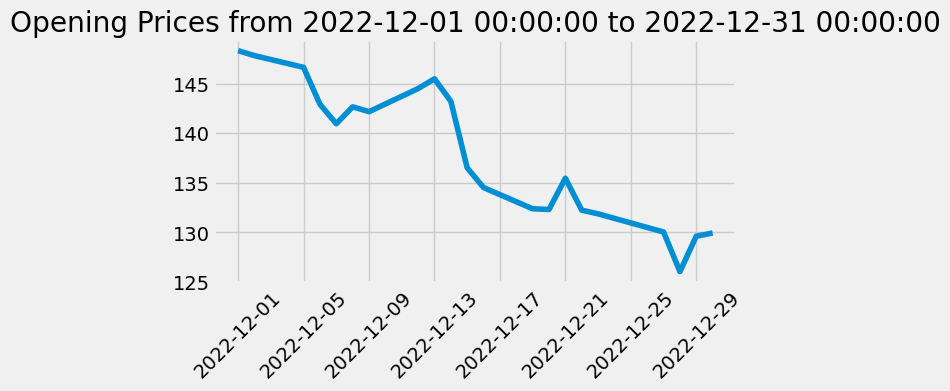

In [21]:
# initialize parameters
start_date = datetime(2022, 12, 1)
end_date = datetime(2022, 12, 31)
  
# get the data
stock_data = yf.download('AAPL', start = start_date,
                   end = end_date)
  
# display closing price 
plt.figure(figsize = (6,3))
plt.title('Opening Prices from {} to {}'.format(start_date,
                                                end_date))
plt.plot(stock_data['Close'])
plt.xticks(rotation = 45)
plt.show()

In [22]:
#Splitting dates and times
stock_data['Dates'] = [d.date() for d in stock_data.index]
stock_data['Time'] = [d.time() for d in stock_data.index]

#Reseting index
stock_data.reset_index()

#Setting the "Dates" column as index because we will be using it to filter out "trading-hours" tweets
stock_data.set_index('Dates', inplace=True)

stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Time
Dates,,,,,,,
2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400,00:00:00
2022-12-02,145.960007,148.000000,145.649994,147.809998,147.809998,65447400,00:00:00
2022-12-05,147.770004,150.919998,145.770004,146.630005,146.630005,68826400,00:00:00
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200,00:00:00
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100,00:00:00


In [23]:
#Rearrange the columns so that it would match with the tweets_data dataframe
cols = stock_data.columns.tolist()
cols = cols[-1:] + cols[:-1]
stock_data = stock_data[cols]

stock_data.head()

,Time,Open,High,Low,Close,Adj Close,Volume
Dates,,,,,,,
2022-12-01,00:00:00,148.210007,149.130005,146.610001,148.309998,148.309998,71250400
2022-12-02,00:00:00,145.960007,148.000000,145.649994,147.809998,147.809998,65447400
2022-12-05,00:00:00,147.770004,150.919998,145.770004,146.630005,146.630005,68826400
2022-12-06,00:00:00,147.070007,147.300003,141.919998,142.910004,142.910004,64727200
2022-12-07,00:00:00,142.190002,143.369995,140.000000,140.940002,140.940002,69721100


In [24]:
#Inspecting the variability in the Time column
stock_data.Time.max()

#Since the Time column does not disect into hours, minutes, and seconds, we will drop it
stock_data.drop('Time', axis=1)

,Open,High,Low,Close,Adj Close,Volume
Dates,,,,,,
2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400
2022-12-02,145.960007,148.000000,145.649994,147.809998,147.809998,65447400
2022-12-05,147.770004,150.919998,145.770004,146.630005,146.630005,68826400
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.649994,62128300
2022-12-09,142.339996,145.570007,140.899994,142.160004,142.160004,76097000
2022-12-12,142.699997,144.500000,141.059998,144.490005,144.490005,70462700
2022-12-13,149.500000,149.970001,144.240005,145.470001,145.470001,93886200


In [25]:
#Checking for null values
missing_stock_price = pd.concat([stock_data.isnull().sum(), 100 * stock_data.isnull().mean()], axis=1)
missing_stock_price.columns=['count','%']
missing_stock_price.sort_values(by=['%'], ascending=False) 

,count,%
Time,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Adj Close,0,0.0
Volume,0,0.0


## 1.4 Saving

In [26]:
stock_data.to_csv('01_stock_data.csv')

In [27]:
tweets_data.to_csv('01_tweets_data.csv')